In [ ]:
#IGNORE
'''

#Step 1: Dataset downloaded and added to Google Drive
!pip install PyDrive
from google.colab import drive
drive.mount('/content/drive')

#Step 2: Reading the dataset
data_path='/content/drive/My Drive/Datasets/Breast Cancer (original)/breast-cancer-wisconsin.data.txt'

import pandas as pd
import numpy as np
df= pd.read_csv(data_path,header=0)
print(df.columns)
print(df.head())
#Step 3: Printing attributes
r=df.shape[0]
c=df.shape[1]

print("Rows:",r)
print("Columns:",c)
print("Size:",df.size)
print("Dimensions:",df.ndim)
for i in df.columns:
  print(type(i))
#Step 4: Common Operations
df.replace('?', -99999, inplace=True)
df.drop(['id'],1,inplace=True)
df = df.astype(float)



tr= df.T #Transpose
print("Transpose")
print(tr) 

print("*"*70)
print("Dot Product")
d= df@tr
print(d)

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

plt.scatter(df['clump_thickness'], df['class'],color='r')
plt.scatter(df['marg_adhesion'],df['class'], color='b')
plt.show()
with open('Lab1.npy', 'wb') as f:
    np.save(f, d)
    np.save(f, tr)
with open('Lab1.npy', 'rb') as f:
    a = np.load(f) ##Dot product
    b = np.load(f) ##Transpose
print(a)
print('*'*70)
print(b)
'''
#IGNORE

'\n\n#Step 1: Dataset downloaded and added to Google Drive\n!pip install PyDrive\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\n\n#Step 2: Reading the dataset\ndata_path=\'/content/drive/My Drive/Datasets/Breast Cancer (original)/breast-cancer-wisconsin.data.txt\'\n\nimport pandas as pd\nimport numpy as np\ndf= pd.read_csv(data_path,header=0)\nprint(df.columns)\nprint(df.head())\n#Step 3: Printing attributes\nr=df.shape[0]\nc=df.shape[1]\n\nprint("Rows:",r)\nprint("Columns:",c)\nprint("Size:",df.size)\nprint("Dimensions:",df.ndim)\nfor i in df.columns:\n  print(type(i))\n#Step 4: Common Operations\ndf.replace(\'?\', -99999, inplace=True)\ndf.drop([\'id\'],1,inplace=True)\ndf = df.astype(float)\n\n\n\ntr= df.T #Transpose\nprint("Transpose")\nprint(tr) \n\nprint("*"*70)\nprint("Dot Product")\nd= df@tr\nprint(d)\n\nimport matplotlib.pyplot as plt\nfrom matplotlib import style\nstyle.use(\'fivethirtyeight\')\n\nplt.scatter(df[\'clump_thickness\'], df[\'class\'],color=\'r

In [ ]:
#TASK 1

!wget https://raw.githubusercontent.com/DeepConnectAI/challenge-week-1/master/data/structured_data/data.csv
import numpy as np
import pandas as pd


--2020-08-12 08:34:35--  https://raw.githubusercontent.com/DeepConnectAI/challenge-week-1/master/data/structured_data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473 [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]     473  --.-KB/s    in 0s      

2020-08-12 08:34:35 (16.8 MB/s) - ‘data.csv’ saved [473/473]



In [ ]:
df =pd.read_csv('/content/data.csv')
print(df)

    Country   Age   Salary Purchased  Price Category Of Purchase
0    France  44.0  72000.0        No                           1
1     Spain  27.0  48000.0       Yes                           1
2   Germany  30.0  54000.0        No                           2
3     Spain  38.0  61000.0        No                           3
4   Germany  40.0      NaN       Yes                           1
5    France  35.0  58000.0       Yes                           2
6     Spain   NaN  52000.0        No                           3
7    France  48.0  79000.0       Yes                           1
8   Germany  50.0  83000.0        No                           2
9    France  37.0  67000.0       Yes                           2
10   France  18.0  54400.0        No                           3
11  Germany  22.0  55000.0       Yes                           3
12  Germany   NaN  58800.0       Yes                           1
13   France  28.0  42000.0        No                           3
14   France  24.0  41000.

In [ ]:
#Converting to labels
df = df.dropna()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df['Country'])
df['Country']= le.transform(df['Country'])

le.fit(df['Purchased'])
df['Purchased']= le.transform(df['Purchased'])


In [ ]:
#Printing first 10 rows after taking care of null values
df.head(10)

,Country,Age,Salary,Purchased,Price Category Of Purchase
0,0,44.0,72000.0,0,1
1,2,27.0,48000.0,1,1
2,1,30.0,54000.0,0,2
3,2,38.0,61000.0,0,3
5,0,35.0,58000.0,1,2
7,0,48.0,79000.0,1,1
8,1,50.0,83000.0,0,2
9,0,37.0,67000.0,1,2
10,0,18.0,54400.0,0,3
11,1,22.0,55000.0,1,3


In [ ]:
#Normalising dataframe
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
#df['Age']= scaler.fit_transform(df['Age'].reshape(-1,1))
#df['Salary']= scaler.fit_transform(df['Salary'])

df['Age']=(df['Age']-df['Age'].min())/(df['Age'].max()-df['Age'].min())
df['Salary']=(df['Salary']-df['Salary'].min())/(df['Salary'].max()-df['Salary'].min())

df

,Country,Age,Salary,Purchased,Price Category Of Purchase
0,0,0.81250,0.738095,0,1
1,2,0.28125,0.166667,1,1
2,1,0.37500,0.309524,0,2
3,2,0.62500,0.476190,0,3
5,0,0.53125,0.404762,1,2
7,0,0.93750,0.904762,1,1
8,1,1.00000,1.000000,0,2
9,0,0.59375,0.619048,1,2
10,0,0.00000,0.319048,0,3
11,1,0.12500,0.333333,1,3


In [ ]:
#Task 2
import os
import numpy as np
import pandas as pd
#import pydicom
import matplotlib.pyplot as plt

from google.colab import files
from IPython.display import Image 

In [ ]:
uploaded = files.upload()

Saving 1.jpeg to 1.jpeg
Saving 5.jpeg to 5.jpeg
Saving 9.jpeg to 9.jpeg
Saving 12.jpeg to 12.jpeg
Saving 22.jpeg to 22.jpeg


In [ ]:
#Storing in the form of a numpy array

im9 = plt.imread("9.jpeg")

im9

array([[[151, 146, 143],
        [151, 146, 143],
        [151, 146, 143],
        ...,
        [146, 142, 139],
        [146, 142, 139],
        [146, 142, 139]],

       [[151, 146, 143],
        [151, 146, 143],
        [151, 146, 143],
        ...,
        [148, 144, 141],
        [148, 144, 141],
        [148, 144, 141]],

       [[152, 147, 144],
        [152, 147, 144],
        [152, 147, 144],
        ...,
        [149, 145, 142],
        [149, 145, 142],
        [149, 145, 142]],

       ...,

       [[197, 202, 206],
        [190, 195, 199],
        [190, 194, 197],
        ...,
        [150, 145, 141],
        [150, 145, 141],
        [150, 145, 141]],

       [[196, 201, 205],
        [192, 197, 201],
        [193, 197, 200],
        ...,
        [149, 144, 140],
        [148, 143, 139],
        [148, 143, 139]],

       [[191, 196, 200],
        [189, 194, 198],
        [193, 197, 200],
        ...,
        [148, 143, 139],
        [147, 142, 138],
        [147, 142, 138]]

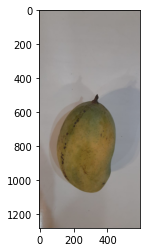

In [ ]:
from matplotlib import image

#RGB Image 9 plotted
plt.imshow(im9)
plt.show()

In [ ]:
im12 = plt.imread("12.jpeg")
print(im12.shape)

(590, 1280, 3)


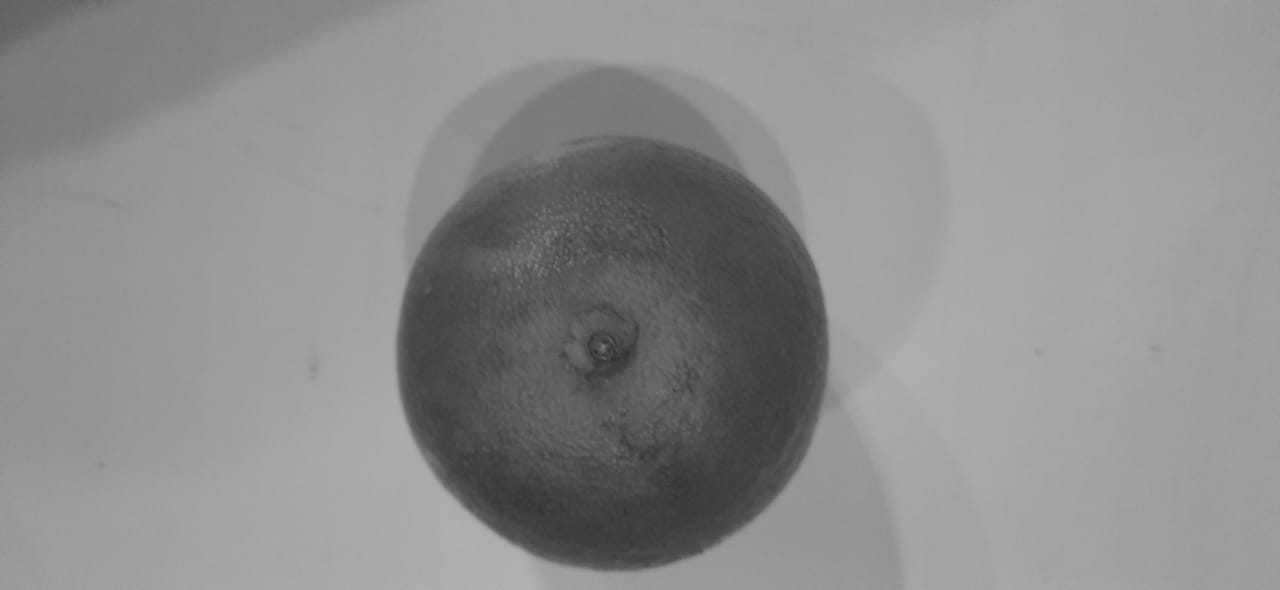

In [ ]:
!pip install Pillow
from PIL import Image

imgr12 = Image.open('12.jpeg').convert('L') #you can pass multiple arguments in single line


imgr12
#print(type(imgr12))
#plt.imshow(imgr12)
#plt.show()
#gr_im= Image.fromarray(imgr12).save('12.png')
#imgr12.show() 
#plti(img, cmap='Greys')

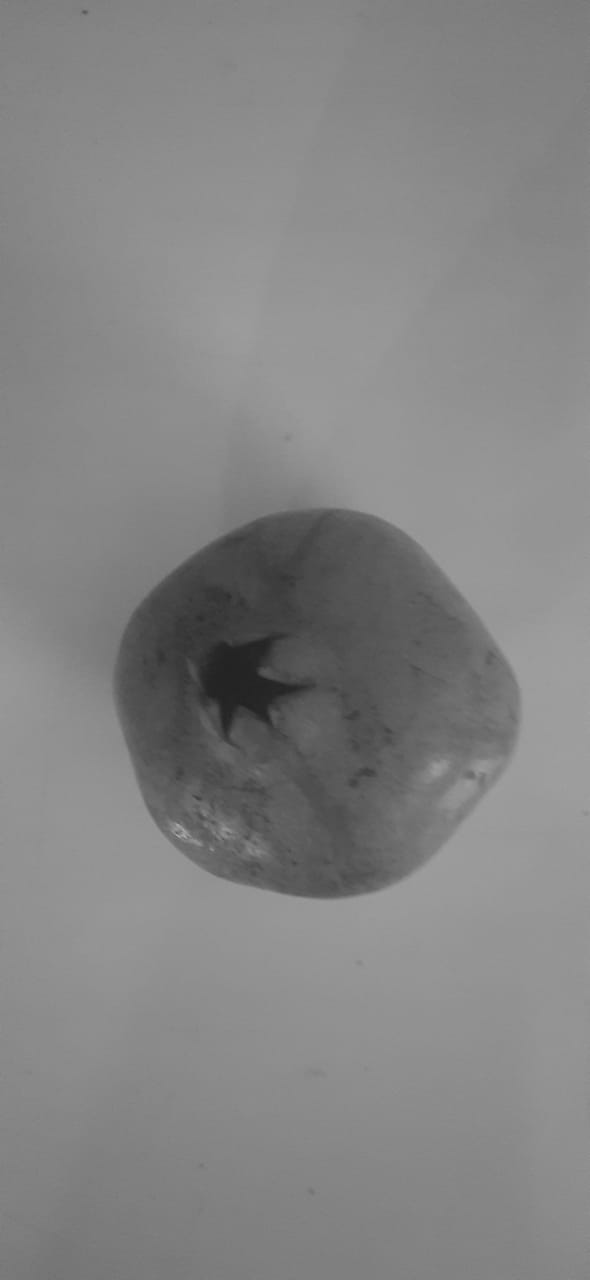

In [ ]:
imgr1 = Image.open('1.jpeg').convert('L') #you can pass multiple arguments in single line
imgr1



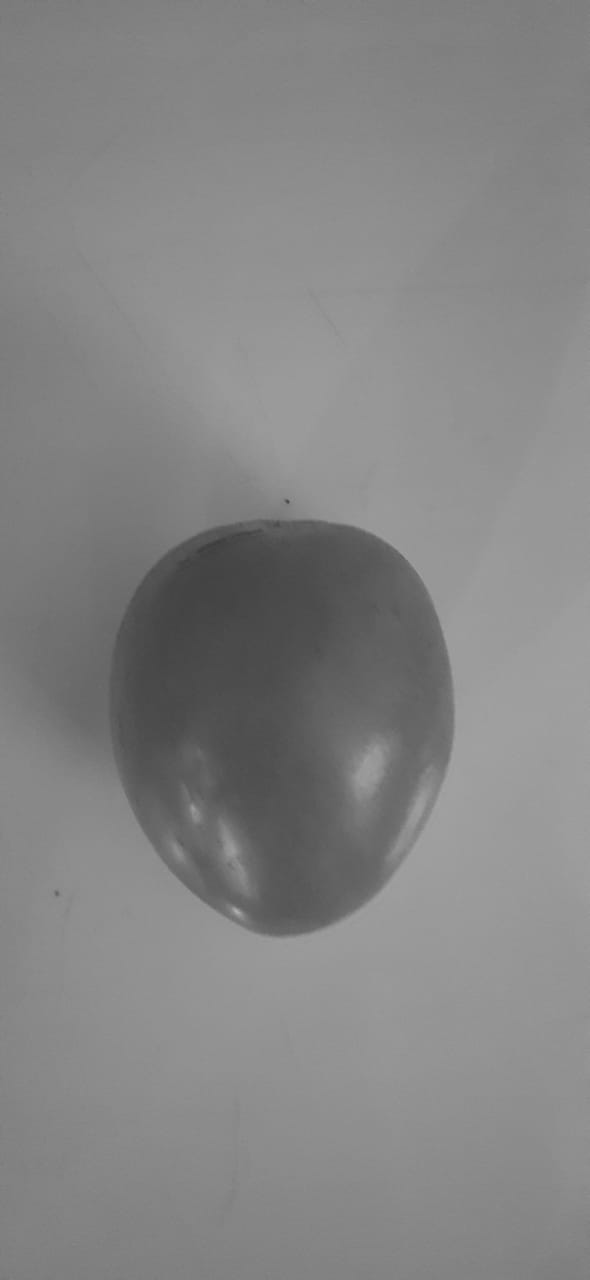

In [ ]:
imgr22 = Image.open('22.jpeg').convert('L') #you can pass multiple arguments in single line
imgr22



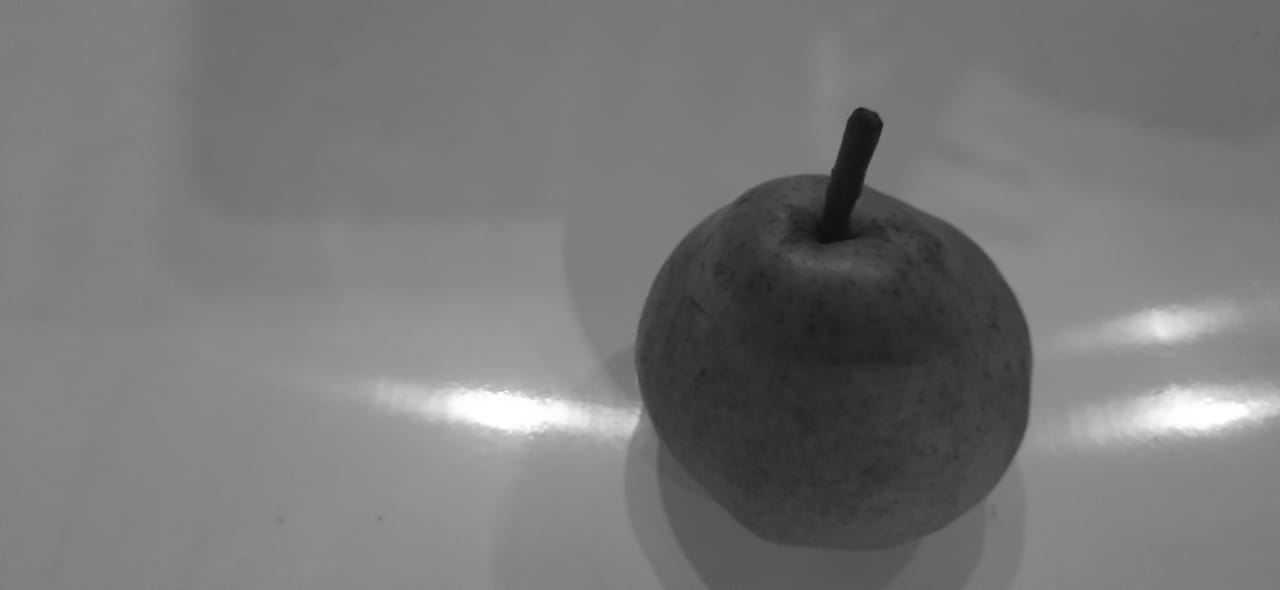

In [ ]:
imgr5 = Image.open('5.jpeg').convert('L') #you can pass multiple arguments in single line
imgr5



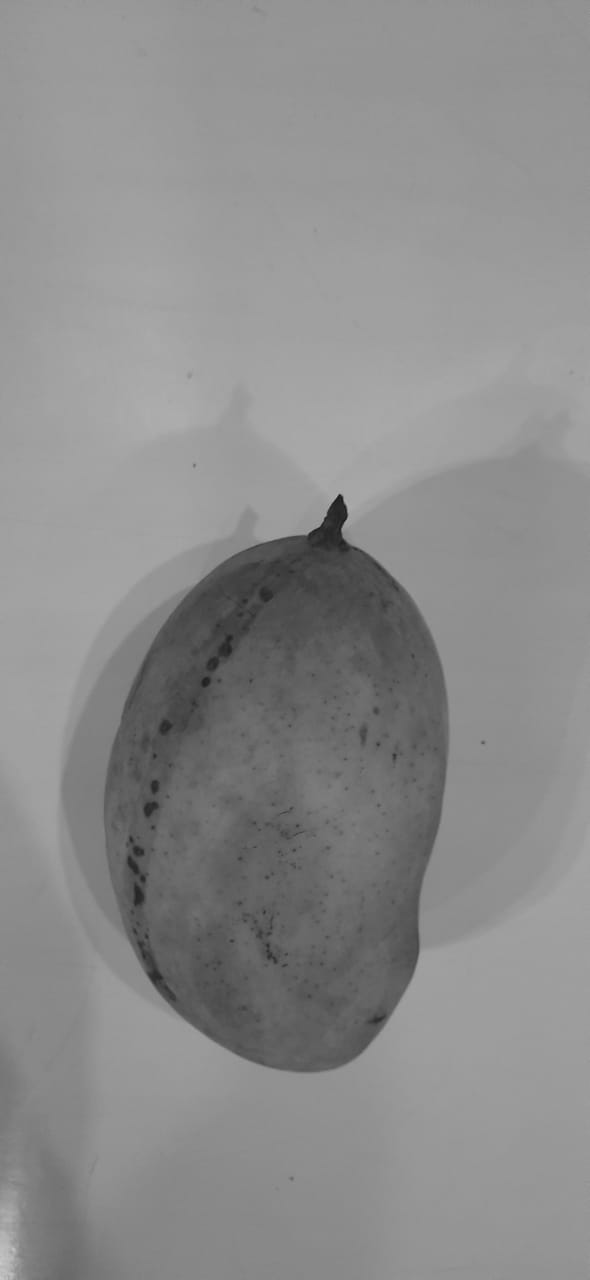

In [ ]:
imgr9 = Image.open('9.jpeg').convert('L') #you can pass multiple arguments in single line
imgr9


In [ ]:
uploaded = files.upload()

Saving 0009.DCM to 0009.DCM


In [ ]:
!pip install dicom
import dicom
ds = dicom.read_file("0009.DCM")

     |████████████████████████████████| 768kB 2.8MB/s 


/usr/local/lib/python3.6/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [ ]:
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'SINGLE PLANE', 'SINGLE A']
(0008, 0016) SOP Class UID                       UI: X-Ray Angiographic Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.4.3.11540117440512.19970422.140030.6
(0008, 0020) Study Date                          DA: '19970422'
(0008, 0030) Study Time                          TM: '131047'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'XA'
(0008, 0070) Manufacturer                        LO: ''
(0008, 0080) Institution Name                    LO: 'Somewhere              '
(0008, 0081) Institution Address                 ST: ''
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1030) Study Description                   LO: ''
(0008, 1050) Performing Physician's Name         PN: ''
(0008, 2112)  Source Image Sequence   1

In [ ]:
print(ds.pixel_array)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


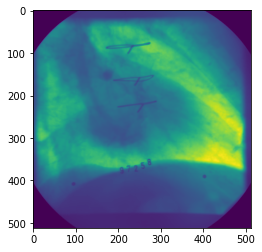

In [ ]:
!pip install pydicom
import matplotlib.pyplot as plt
import pydicom
#from pydicom.data import get_testdata_files
#filename = get_testdata_files("0009.DCM")[0]
ds = pydicom.dcmread("0009.DCM")

dic_img= ds.pixel_array.mean(axis=0)
plt.imshow(dic_img) 

In [ ]:
#TASK 3

import cv2 # For handling videos
import matplotlib.pyplot as plt # For plotting images, you can use pillow library as well
import numpy as np # For mathematical operations

In [ ]:
uploaded = files.upload()

In [ ]:
'''FPS = 10
	# Playing video from file:
	
	

cap = cv2.VideoCapture('VID_2.mp4')
cap.set(cv2.CAP_PROP_FPS, FPS)

if (cap.isOpened()== False): 
  print("Error opening video stream or file")


success,image = cap.read()
count = 0
while success:
  
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = cap.read()
  print('Read a new frame: ', success)
  count += 1'''
  

In [ ]:
#import cv2 
vidcap = cv2.VideoCapture('VID_2.mp4') 
def getFrame(sec): 
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000) 
    hasFrames,image = vidcap.read() 
    if hasFrames: 
        cv2.imwrite("frame "+str(sec)+" sec.jpg", image)     # save frame as JPG file 
    return hasFrames 
sec = 0 
frameRate = 0.1 #it will capture image in each 0.5 second  #10 FPS
success = getFrame(sec) 
while success: 
    sec = sec + frameRate 
    sec = round(sec, 2) 
    success = getFrame(sec) 

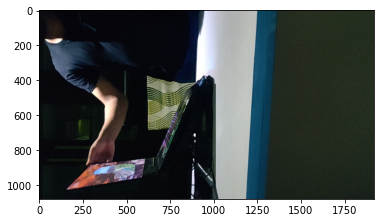

In [ ]:
fram= plt.imread('frame 0.3 sec.jpg')
plt.imshow(fram)


In [ ]:
#Performing all operations on VID_2.mp4 due to internet issues
#Dimension of 4th frame of VID_2.mp4
print(fram.shape)

(1080, 1920, 3)


In [ ]:
#of 10th frame of VID_2.mp4
fram10= plt.imread('frame 1.0 sec.jpg')
fram10

array([[[15, 14, 22],
        [12, 11, 19],
        [11, 10, 18],
        ...,
        [40, 49, 32],
        [45, 54, 35],
        [38, 47, 28]],

       [[12, 11, 19],
        [10,  9, 17],
        [11, 10, 18],
        ...,
        [41, 50, 33],
        [43, 52, 33],
        [35, 44, 25]],

       [[10,  9, 17],
        [10,  9, 17],
        [12, 11, 19],
        ...,
        [35, 46, 29],
        [37, 49, 29],
        [32, 41, 22]],

       ...,

       [[13, 14, 19],
        [14, 15, 20],
        [13, 14, 19],
        ...,
        [23, 30, 23],
        [23, 30, 23],
        [24, 31, 24]],

       [[12, 13, 18],
        [12, 13, 18],
        [12, 13, 18],
        ...,
        [21, 28, 21],
        [20, 27, 20],
        [20, 27, 20]],

       [[12, 13, 18],
        [12, 13, 18],
        [11, 12, 17],
        ...,
        [21, 28, 21],
        [19, 26, 19],
        [18, 25, 18]]], dtype=uint8)

In [ ]:

width = vidcap.get(3)
height = vidcap.get(4)
width, height

(1920.0, 1080.0)

In [ ]:
cap.release()
cv2.destroyAllWindows()